In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
import scipy
import scipy.integrate as integrate

%matplotlib notebook

In [2]:
def k_rational(x, a=-14):
    return x/(x+a)


def k_exp(x, a, alpha=1 ):
    return 1-alpha*np.exp(np.abs(x)/a)

In [3]:
a=-14

aend = -60
x = np.linspace(aend, 0, abs(aend)+1)

Kexp = k_exp(x, a)
Krat = k_rational(x, a)

plt.figure(figsize=(10, 6))

plt.plot(x, Kexp, label = r"$1 -\exp(x/a)$")
plt.plot(x, Krat, label = r"$\frac{x}{x+a}$")

plt.ylabel("K(x-y)")
plt.xlabel("x-y")

plt.title("K(x-y), a=14")
plt.legend(loc="best")



<IPython.core.display.Javascript object>

In [4]:

def system(ri, ii  ):
      
    R0 = 1.8
    
    r = -R0 * ri * np.dot(K, ii) + ii  
    i = ii* ( R0 *np.dot(K, ri) - 1 )
    
    return r, i



In [6]:
n_shtamms = 300

mn = np.linspace(-n_shtamms, 0 , n_shtamms+1, dtype = int)

K = []

for i in range(len(mn)):
    k_temp = []
    for j in range(len(mn)):
        if (j>=i):
            k_temp.append(k_rational(i-j))
        else:
            k_temp.append(0)
            
    K.append(k_temp)
          
K=np.array(K)
K[0][0]=0
 

In [7]:
K.shape

(301, 301)

<IPython.core.display.Javascript object>


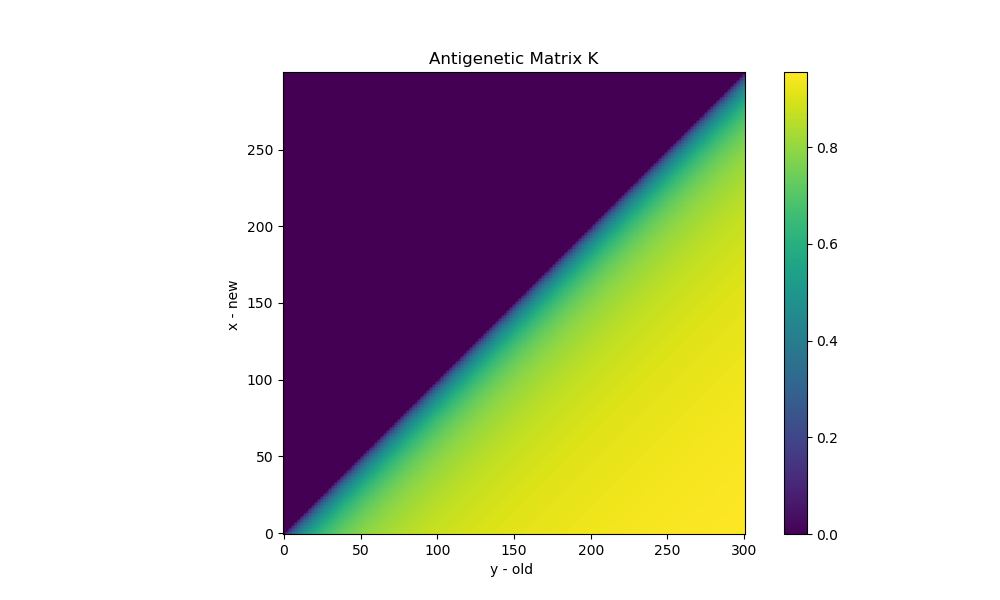

Text(0, 0.5, 'x - new ')

In [8]:

plt.figure(figsize=(10, 6))


plt.yticks(np.arange(0, n_shtamms, 50))

#plt.imshow(np.flip(K,0))

plt.imshow(K,  origin = 'lower')

plt.colorbar()
 
plt.title("Antigenetic Matrix K")

plt.xlabel("y - old ")
plt.ylabel("x - new ")

<IPython.core.display.Javascript object>


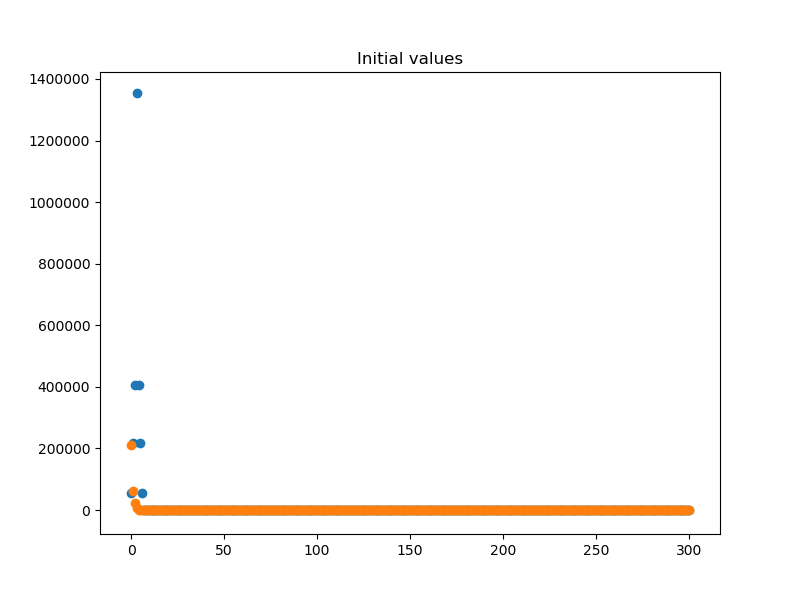

3010000.0


In [13]:
K=K

N_populations = (n_shtamms+1) * 10000

ratios = { 0: 50, 1:15, 2:8, 3:2}

r0 = np.zeros((1, n_shtamms+1)).T
i0 = np.zeros((1, n_shtamms+1)).T

for i in range(4):
    r0[3-i] = 0.9 * N_populations * ratios[i]/100
    r0[3+i] = 0.9 * N_populations * ratios[i]/100
#r0 = np.ones((1, n_shtamms+1)).T * 0.9 * N_populations / (n_shtamms+1) 
#i0 = np.ones((1, n_shtamms+1)).T * 0.1 * N_populations / (n_shtamms+1) 

i0[0] = 0.1 * N_populations * 0.7 
i0[1] = 0.1 * N_populations * 0.2
i0[2] = 0.1 * N_populations * 0.08
i0[3] = 0.1 * N_populations * 0.02


plt.figure(figsize=(8, 6))

plt.scatter(np.arange(0, n_shtamms+1, 1), r0, label = "recovered")
plt.scatter(np.arange(0, n_shtamms+1, 1), i0, label = "infected")

plt.title("Initial values")

print(np.sum(r0) + np.sum(i0))

<IPython.core.display.Javascript object>


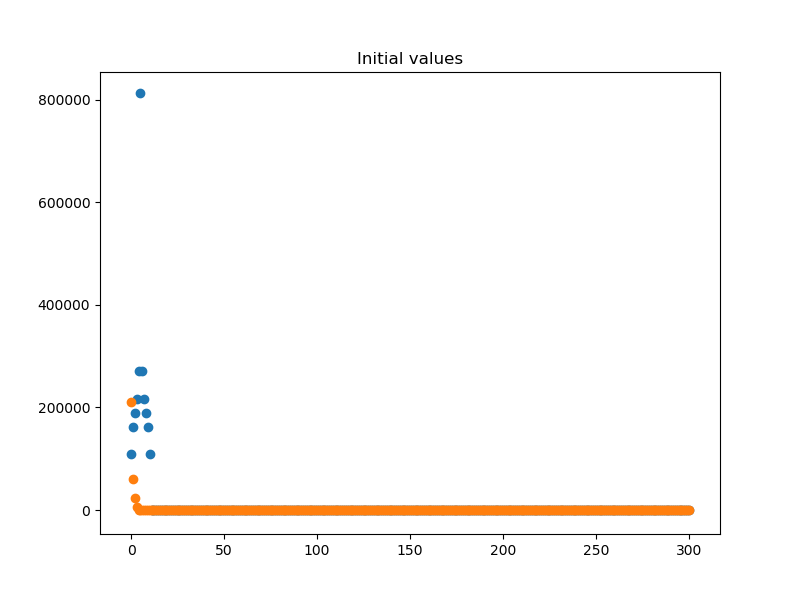

3010000.0


In [14]:
N_populations = (n_shtamms+1) * 10000

ratios = { 0: 30, 1:10, 2:8, 3:7, 4:6, 5:4 }

r0 = np.zeros((1, n_shtamms+1)).T
i0 = np.zeros((1, n_shtamms+1)).T

for i in range(6):
    r0[5-i] = 0.9 * N_populations * ratios[i]/100
    r0[5+i] = 0.9 * N_populations * ratios[i]/100
#r0 = np.ones((1, n_shtamms+1)).T * 0.9 * N_populations / (n_shtamms+1) 
#i0 = np.ones((1, n_shtamms+1)).T * 0.1 * N_populations / (n_shtamms+1) 

i0[0] = 0.1 * N_populations * 0.7 
i0[1] = 0.1 * N_populations * 0.2
i0[2] = 0.1 * N_populations * 0.08
i0[3] = 0.1 * N_populations * 0.02
 
plt.figure(figsize=(8, 6))

plt.scatter(np.arange(0, n_shtamms+1, 1), r0, label = "recovered")
plt.scatter(np.arange(0, n_shtamms+1, 1), i0, label = "infected")

plt.title("Initial values")

print(np.sum(r0) + np.sum(i0))

In [15]:
nsteps = 1
h = 0.001 
for i in range(nsteps):
    rc, ic = system(r0, i0 )
    
    r1 = r0 + h * rc 
    i1 = i0 + h * ic 
    
    r0 = r1
    i0 = i1
    
    print(r0, i0)

[[-1468526.23647059]
 [ -527235.814     ]
 [   52665.368     ]
 [  216726.02      ]
 [  270900.        ]
 [  812700.        ]
 [  270900.        ]
 [  216720.        ]
 [  189630.        ]
 [  162540.        ]
 [  108360.        ]
 [       0.        ]
 [       0.        ]
 [       0.        ]
 [       0.        ]
 [       0.        ]
 [       0.        ]
 [       0.        ]
 [       0.        ]
 [       0.        ]
 [       0.        ]
 [       0.        ]
 [       0.        ]
 [       0.        ]
 [       0.        ]
 [       0.        ]
 [       0.        ]
 [       0.        ]
 [       0.        ]
 [       0.        ]
 [       0.        ]
 [       0.        ]
 [       0.        ]
 [       0.        ]
 [       0.        ]
 [       0.        ]
 [       0.        ]
 [       0.        ]
 [       0.        ]
 [       0.        ]
 [       0.        ]
 [       0.        ]
 [       0.        ]
 [       0.        ]
 [       0.        ]
 [       0.        ]
 [       0.        ]
 [       0.  

In [18]:
(np.sum(r0) + np.sum(i0) ) - N_populations

340146394.25096095

In [ ]:
K

In [ ]:
integrate.quad(k_rational*ii, -np.inf, -1)[0]

In [ ]:
ii = np.ones((0,20,21))/21

integrate.quad(k_rational*ii, -np.inf, 1)[0]